##                                                                   $$MartinDudi$$
##                                                                     $$Data Analyst$$
##                                                                     $$and$$
###                                                                     $$ML Engineer$$

In [1]:
# Importing fundamental libraries for numerical computations and data manipulation
import numpy as np  # for numerical operations and array handling
import pandas as pd  # for data manipulation and analysis

# Importing libraries for data visualization
import matplotlib.pyplot as plt  # for creating static plots
import seaborn as sns  # for advanced statistical visualizations and styling
import plotly.graph_objects as go  #  is a lower-level interface for creating figures. 
import plotly.express as px        #   is a higher-level, more concise interface to create interactive plots quickly and with less code. 

# Setting a style for the visualizations
sns.set(style="whitegrid")  
import warnings
warnings.filterwarnings("ignore")


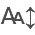

In [2]:
import itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [3]:
# Define the filepathL of the dataset
filepath = 'World Energy Consumption.csv'

# Load the dataset into a DataFrame
dataset = pd.read_csv(filepath)  # Reads the CSV file from the provided URL into a DataFrame


In [4]:
# Display the first few rows and data types of the dataset
data_head = dataset.head()
data_head

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
0                      NaN  ...               0.0                 NaN   
1                      NaN  ...               0.0                 NaN   
2                      NaN  ...               0.0                 NaN   
3                      NaN  ...               0.0                 NaN   
4                      NaN  ...               0.0                 NaN   

   wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
0                   NaN                   NaN               NaN   
1                   NaN                   NaN               NaN   
2                   NaN                   NaN               NaN   
3                   NaN                   NaN               NaN   
4                   NaN                   NaN               NaN   

   wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
0                   NaN               0.0                     NaN   
1                   NaN               0.0                     NaN   
2                   NaN               0.0                     NaN   
3                   NaN               0.0                     NaN   
4                   NaN               0.0                     NaN   

   wind_share_elec  wind_share_energy  
0              0.0                NaN  
1              0.0                NaN  
2              0.0                NaN  
3              0.0                NaN  
4              0.0                NaN  

[5 rows x 129 columns]

In [5]:
data_info = dataset.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.7+ MB


- The dataset contains 22012 entries and 129 columns. The columns consist of different data types, mainly:

    a. 126 columns of type float64: These represent continuous numeric data.

    b. 1 column of type int64: This represents discrete numeric data.

    c. 2 columns of type object: These represent categorical data.


**Datatype Identification:**

`float64:` These are continuous numeric fields that can take decimal values. Examples include energy consumption values, changes in consumption, and per capita measures.

`int64:` This is a discrete numeric field used for counting or other whole-number data. Here, the year is the only integer type.

`object:` These are typically used for categorical data like country and iso_code

### Energy Consumption Data

1. The dataset includes columns on various energy consumption metrics such as biofuels, solar, and wind energy, as well as general indicators like population and GDP.

2. Some columns contain null or NaN values, notably in the early rows for the "ASEAN (Ember)" region.

3. Energy consumption metrics are provided in different units, including per capita values, total values, percentages, and shares.


### Significance of Each Datatype in Machine Learning:

- `float64:` These columns are crucial for regression models, statistical analyses, and other ML algorithms that work with continuous data.

- `int64:` These are important for time series analysis, especially with the year column. They are used in temporal modeling.

- `object:` These are essential for categorical features, often one-hot encoded or used as labels in classification tasks.

- The total memory usage is around 21.7 MB.

### `A few observations based on the data types:`

- Having so many float columns suggests the consumption metrics allow decimal/fractional values, which is expected.

- The single int column could potentially be something like a year or country code.

- The object columns are likely textual labels like country names.

### `To gain a better understanding of the data distributions and completeness, let's examine summary statistics and counting null values.`

In [6]:
# Check for missing values in the dataset
# This command will return the number of null values in each column
missing_values = dataset.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

country                       0
year                          0
iso_code                   5500
population                 3889
gdp                       10899
                          ...  
wind_elec_per_capita      14947
wind_electricity          14016
wind_energy_per_capita    17947
wind_share_elec           15126
wind_share_energy         17911
Length: 129, dtype: int64


- `No Missing Values:` The `country` and `year` columns are complete, which is important as they likely serve as key identifiers.

- `High Missing Values:`

`iso_code:` 5,500 missing values

`gdp:` 10,899 missing values

`Wind Energy Metrics:` Columns related to wind energy, such as `wind_elec_per_capita`, have approximately 14,000 to 17,000 missing values.

`population`: 3,889 missing values

This analysis highlights that while the dataset spans a long time period, there are substantial gaps in secondary variables like GDP, population, and wind energy metrics across different countries and years. Addressing this missing data is crucial

## Data Description

In [7]:
dataset.describe()

year    population           gdp  biofuel_cons_change_pct  \
count  22012.000000  1.812300e+04  1.111300e+04              1747.000000   
mean    1974.213247  1.053096e+08  3.585114e+11                46.091694   
std       35.058653  4.640460e+08  2.411179e+12               274.616745   
min     1900.000000  1.833000e+03  1.642060e+08              -100.000000   
25%     1946.000000  1.712404e+06  1.365898e+10                -0.616500   
50%     1984.000000  6.991543e+06  4.167411e+10                 8.179000   
75%     2003.000000  2.557688e+07  1.744300e+11                26.508500   
max     2022.000000  7.975105e+09  1.136300e+14              5659.328000   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count              2687.000000              2302.000000          2767.000000   
mean                  2.719074               133.558459            38.068209   
std                  10.057018               264.707851           111.623148   
min                 -50.843000                 0.000000             0.000000   
25%                   0.000000                 0.000000             0.000000   
50%                   0.000000                15.482000             0.673000   
75%                   0.861500               165.266750            13.629500   
max                 141.131000              2588.512000          1199.207000   

       biofuel_elec_per_capita  biofuel_electricity  biofuel_share_elec  ...  \
count              5275.000000          5527.000000         5492.000000  ...   
mean                 64.716800            10.966685            1.954035  ...   
std                 201.043915            47.953561            5.274155  ...   
min                   0.000000             0.000000            0.000000  ...   
25%                   0.000000             0.000000            0.000000  ...   
50%                   0.146000             0.010000            0.062000  ...   
75%                  34.289000             0.690000            1.577500  ...   
max                2514.102000           677.570000           71.429000  ...   

       solar_share_elec  solar_share_energy  wind_cons_change_pct  \
count       6849.000000         4035.000000           2413.000000   
mean           0.622750            0.210395            267.541206   
std            2.066186            0.643304           5940.944120   
min            0.000000            0.000000           -100.000000   
25%            0.000000            0.000000              4.029000   
50%            0.000000            0.000000             20.000000   
75%            0.095000            0.018500             47.971000   
max           40.000000            7.586000         242384.844000   

       wind_cons_change_twh  wind_consumption  wind_elec_per_capita  \
count           4639.000000       4744.000000           7065.000000   
mean               7.314174         53.422938             62.811828   
std               37.327922        273.255306            252.734217   
min              -51.208000          0.000000              0.000000   
25%                0.000000          0.000000              0.000000   
50%                0.000000          0.005000              0.000000   
75%                0.315000          2.357750              2.101000   
max              665.413000       5487.600000           3219.852000   

       wind_electricity  wind_energy_per_capita  wind_share_elec  \
count       7996.000000             4065.000000      6886.000000   
mean          17.561153              232.108949         1.404910   
std          101.693172              733.841324         4.489043   
min            0.000000                0.000000         0.000000   
25%            0.000000                0.000000         0.000000   
50%            0.000000                0.051000         0.000000   
75%            0.140000               45.523000         0.372000   
max         2139.230000             8422.012000        56.840000   

       wind_s

The dataset covers years from `1900` to`2022`, as anticipated. The population and GDP figures exhibit a broad range, from very small to extremely large values.


For biofuel consumption, the median values are in the single digits, but the 75th percentiles reach into the hundreds. This indicates that while most countries have low biofuel usage, there are a few with exceptionally high consumption, with the maximum biofuel per capita reaching 2,588.


Many renewable energy metrics, such as biofuel, solar, and wind shares, show a median of zero. This suggests that these sources are still emerging or not widely adopted in many countries.


Nevertheless, notable figures include a maximum wind consumption of 5,487 TWh and a wind energy share of up to 56.84% of electricity, indicating that some countries are leading in wind energy.


The high standard deviations and extreme maximum values compared to medians and means across various columns highlight significant skewness and the presence of outliers in the data distributio

In [8]:
# Iterate over each column in the dataset
# This loop will print the name of each column
for col in dataset.columns:
    print(col)  # Print the name of the current column

country
year
iso_code
population
gdp
biofuel_cons_change_pct
biofuel_cons_change_twh
biofuel_cons_per_capita
biofuel_consumption
biofuel_elec_per_capita
biofuel_electricity
biofuel_share_elec
biofuel_share_energy
carbon_intensity_elec
coal_cons_change_pct
coal_cons_change_twh
coal_cons_per_capita
coal_consumption
coal_elec_per_capita
coal_electricity
coal_prod_change_pct
coal_prod_change_twh
coal_prod_per_capita
coal_production
coal_share_elec
coal_share_energy
electricity_demand
electricity_generation
electricity_share_energy
energy_cons_change_pct
energy_cons_change_twh
energy_per_capita
energy_per_gdp
fossil_cons_change_pct
fossil_cons_change_twh
fossil_elec_per_capita
fossil_electricity
fossil_energy_per_capita
fossil_fuel_consumption
fossil_share_elec
fossil_share_energy
gas_cons_change_pct
gas_cons_change_twh
gas_consumption
gas_elec_per_capita
gas_electricity
gas_energy_per_capita
gas_prod_change_pct
gas_prod_change_twh
gas_prod_per_capita
gas_production
gas_share_elec
gas_share

In [9]:

file_path = 'owid-energy-codebook.csv'  
df = pd.read_csv(file_path)  

print("Column Descriptions and Units:")
print("="*40)
for index, row in df.iterrows():
    print(f"Column: {row['Name']}")
    print(f"Description: {row['description']}")
    print(f"Unit: {row['unit']}")
    print("-"*40)

Column Descriptions and Units:
Column: country
Description: Country - Geographic location.
Unit: nan
----------------------------------------
Column: year
Description: Year - Year of observation.
Unit: nan
----------------------------------------
Column: iso_code
Description: ISO code - ISO 3166-1 alpha-3 three-letter country codes.
Unit: nan
----------------------------------------
Column: population
Description: Population - Population by country, available from 10,000 BCE to 2100, based on data and estimates from different sources.
Unit: persons
----------------------------------------
Column: gdp
Description: Gross domestic product (GDP) - This data is adjusted for inflation and differences in the cost of living between countries.
Unit: international-$ in 2011 prices
----------------------------------------
Column: biofuel_cons_change_pct
Description: Annual percentage change in biofuel consumption - Includes biogasoline (such as ethanol) and biodiesel. Volumes have been adjusted f

## Data Cleaning
In our dataset in the country column, there aren't just countries but so many different political groups, continents, deemed to be countries or special status regions included which we have to find and remove as we our scope in this project is limited to countries only

In [10]:
dataset.country.unique().tolist()

['ASEAN (Ember)',
 'Afghanistan',
 'Africa',
 'Africa (EI)',
 'Africa (Ember)',
 'Africa (Shift)',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Asia & Oceania (EIA)',
 'Asia (Ember)',
 'Asia Pacific (EI)',
 'Asia and Oceania (Shift)',
 'Australia',
 'Australia and New Zealand (EIA)',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'CIS (EI)',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central & South America (EIA)',
 'Central African Republic',
 'Central America (EI)',
 'Central and South America (Shift)',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croa

In [11]:
# Filter out entries representing political groups, continents, or entities deemed to be countries 
# or special status regions, as they are not relevant for our analysis or dataset.

dataset = dataset[~dataset.country.isin(["ASEAN (Ember)",'Africa (EI)',"Africa (Ember)","Africa (Shift)","Antarctica","Asia","Asia & Oceania (EIA)","Asia (Ember)",
                             "Asia Pacific (EI)","Asia and Oceania (Shift)","Australia and New Zealand (EIA)","CIS (EI)",
                             "Central & South America (EIA)","Central America (EI)","Central and South America (Shift)",
                            "EU28 (Shift)","East Germany (EIA)","East Timor","Eastern Africa (EI)",
                            "Eurasia (EIA)","Eurasia (Shift)","Europe","Europe (EI)""Europe (Ember)","Europe (Shift)","European Union (27)",
                            "European Union (EIA)","Falkland Islands","Faroe Islands","French Guiana","French Polynesia","G20 (Ember)",
                             "G7 (Ember)","Hawaiian Trade Zone (EIA)","High-income countries","IEO - Africa (EIA)","IEO - Middle East (EIA)",
                             "IEO OECD - Europe (EIA)","Latin America and Caribbean (Ember)","Low-income countries", "Lower-middle-income countries",
                             "Mexico, Chile, and other OECD Americas (EIA)","Micronesia (country)","Middle Africa (EI)","Middle East (EI)",
                             "Middle East (EIA)","Middle East (Ember)","Middle East (Shift)","Netherlands Antilles","New Caledonia","Non-OECD (EI)",
                             "Non-OECD (EIA)","Non-OPEC (EI)","Non-OPEC (EIA)","North America","North America (EI)","North America (Ember)",
                             "North America (Shift)","OECD (EI)","OECD (EIA)","OECD (Ember)","OECD (Shift)","OECD - Asia And Oceania (EIA)",
                             "OECD - Europe (EIA)","OECD - North America (EIA)","OPEC (EI)","OPEC (EIA)","OPEC (Shift)","OPEC - Africa (EIA)",
                             "OPEC - South America (EIA)","Oceania","Oceania (Ember)","Other Non-OECD - America (EIA)","Other Non-OECD - Asia (EIA)",
                             "Other Non-OECD - Europe and Eurasia (EIA)","Persian Gulf (EIA)","Persian Gulf (Shift)","Reunion","Saint Helena",
                             "Saint Kitts and Nevis","Saint Lucia","Saint Pierre and Miquelon","Saint Vincent and the Grenadines","Sao Tome and Principe",
                             "South America","South Korea and other OECD Asia (EIA)","South Sudan","South and Central America (EI)","U.S. Pacific Islands (EIA)",
                             "U.S. Territories (EIA)","USSR","United States Pacific Islands (Shift)","United States Territories (Shift)",
                             "Upper-middle-income countries","Wake Island (EIA)","Wake Island (Shift)","West Germany (EIA)","Western Africa (EI)",
                             "Western Sahara","World",'Africa'])]

In [12]:
dataset.head()

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
23  Afghanistan  1900      AFG   4707744.0  NaN                      NaN   
24  Afghanistan  1901      AFG   4751177.0  NaN                      NaN   
25  Afghanistan  1902      AFG   4802500.0  NaN                      NaN   
26  Afghanistan  1903      AFG   4861833.0  NaN                      NaN   
27  Afghanistan  1904      AFG   4921891.0  NaN                      NaN   

    biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
23                      NaN                      NaN                  NaN   
24                      NaN                      NaN                  NaN   
25                      NaN                      NaN                  NaN   
26                      NaN                      NaN                  NaN   
27                      NaN                      NaN                  NaN   

    biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
23                      NaN  ...               NaN                 NaN   
24                      NaN  ...               NaN                 NaN   
25                      NaN  ...               NaN                 NaN   
26                      NaN  ...               NaN                 NaN   
27                      NaN  ...               NaN                 NaN   

    wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
23                   NaN                   NaN               NaN   
24                   NaN                   NaN               NaN   
25                   NaN                   NaN               NaN   
26                   NaN                   NaN               NaN   
27                   NaN                   NaN               NaN   

    wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
23                   NaN               NaN                     NaN   
24                   NaN               NaN                     NaN   
25                   NaN               NaN                     NaN   
26                   NaN               NaN                     NaN   
27                   NaN               NaN                     NaN   

    wind_share_elec  wind_share_energy  
23              NaN                NaN  
24              NaN                NaN  
25              NaN                NaN  
26              NaN                NaN  
27              NaN                NaN  

[5 rows x 129 columns]

In [13]:
dataset.shape

(16113, 129)

In [14]:
# Check for missing values in the dataset
# This command will return the number of null values in each column
missing_values = dataset.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

country                       0
year                          0
iso_code                    303
population                  166
gdp                        5187
                          ...  
wind_elec_per_capita       9983
wind_electricity           9902
wind_energy_per_capita    12666
wind_share_elec           10608
wind_share_energy         13251
Length: 129, dtype: int64


The International Energy Agency (IEA) is an independent organization based in Paris, created in 1974. It offers policy recommendations, analysis, and data related to the global energy sector. The IEA comprises 31 member countries and 13 associated countries, which collectively account for 75% of global energy consumption.

The main role of the IEA is to advise its member and associated countries on energy policies to enhance their energy security and facilitate their shift toward clean energy sources.

In [15]:
# While data from the year 1900 is available, it would be more sensible to focus our analysis from 1974 onwards 
# to assess the influence of such regulatory bodies and its members on global energy security.

data = dataset[dataset['year']>=1974]

In [16]:
dataset.select_dtypes(exclude='object').columns.to_list()

['year',
 'population',
 'gdp',
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'carbon_intensity_elec',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_electricity',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'coal_prod_per_capita',
 'coal_production',
 'coal_share_elec',
 'coal_share_energy',
 'electricity_demand',
 'electricity_generation',
 'electricity_share_energy',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
 'fossil_elec_per_capita',
 'fossil_electricity',
 'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 'gas_consumption',
 'gas_

In [17]:
dataset.select_dtypes(include='object').columns.to_list()

['country', 'iso_code']

In [18]:
dataset.describe().T

count          mean           std           min  \
year                     16113.0  1.972135e+03  3.558545e+01  1.900000e+03   
population               15947.0  2.788544e+07  1.029496e+08  1.833000e+03   
gdp                      10926.0  2.902563e+11  1.072844e+12  1.642060e+08   
biofuel_cons_change_pct   1080.0  6.390185e+01  3.447011e+02 -1.000000e+02   
biofuel_cons_change_twh   1738.0  8.048527e-01  4.316093e+00 -3.754900e+01   
...                          ...           ...           ...           ...   
wind_elec_per_capita      6130.0  5.745515e+01  2.347040e+02  0.000000e+00   
wind_electricity          6211.0  4.131412e+00  3.266319e+01  0.000000e+00   
wind_energy_per_capita    3447.0  2.394506e+02  7.744819e+02  0.000000e+00   
wind_share_elec           5505.0  1.309761e+00  4.336857e+00  0.000000e+00   
wind_share_energy         2862.0  7.604983e-01  2.175475e+00  0.000000e+00   

                                  25%           50%           75%  \
year                     1.942000e+03  1.982000e+03  2.002000e+03   
population               1.807774e+06  6.254888e+06  1.823196e+07   
gdp                      1.385072e+10  4.147577e+10  1.691262e+11   
biofuel_cons_change_pct -1.490750e+00  8.307000e+00  3.086675e+01   
biofuel_cons_change_twh  0.000000e+00  0.000000e+00  2.730000e-01   
...                               ...           ...           ...   
wind_elec_per_capita     0.000000e+00  0.000000e+00  1.488250e+00   
wind_electricity         0.000000e+00  0.000000e+00  2.850000e-02   
wind_energy_per_capita   0.000000e+00  0.000000e+00  4.182250e+01   
wind_share_elec          0.000000e+00  0.000000e+00  1.290000e-01   
wind_share_energy        0.000000e+00  3.000000e-03  3.067500e-01   

                                  max  
year                     2.022000e+03  
population               1.425894e+09  
gdp                      1.815160e+13  
biofuel_cons_change_pct  5.659328e+03  
biofuel_cons_change_twh  6.087500e+01  
...                               ...  
wind_elec_per_capita     3.219852e+03  
wind_electricity         8.005200e+02  
wind_energy_per_capita   8.422012e+03  
wind_share_elec          5.684000e+01  
wind_share_energy        2.615700e+01  

[127 rows x 8 columns]

**When working with datasets, it's important to examine how different features are distributed and identify any missing values. This can be done using various data visualization methods and summary statistics that reveal these characteristics. Properly addressing missing data is key to preserving the dataset's accuracy and reliability. Depending on the situation and the type of data, you might handle missing values through methods like imputation or by excluding them. A detailed review of these factors is crucial for achieving precise and dependable analysis results.**

In [19]:
np.round(data.isna().sum()*100/data.shape[0])

country                    0.0
year                       0.0
iso_code                   2.0
population                 1.0
gdp                       26.0
                          ... 
wind_elec_per_capita      35.0
wind_electricity          34.0
wind_energy_per_capita    64.0
wind_share_elec           39.0
wind_share_energy         70.0
Length: 129, dtype: float64

In [20]:
def plot_world_map_with_slider(column_name):
    fig = go.Figure()
    for year in range(1974, 2023):
        filtered_df = dataset[dataset['year'] == year]
        trace = go.Choropleth(
            locations=filtered_df['country'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',
            colorbar=dict(title=column_name),
            zmin=dataset[column_name].min(),
            zmax=dataset[column_name].max(),
            visible=False
        )
        fig.add_trace(trace)

    fig.data[0].visible = True
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(1974 + i)
        )
        step['args'][0]['visible'][i] = True
        steps.append(step)

    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},
    )]

    fig.update_layout(
        title_text=f'{column_name.upper()} MAP',
        title_font_size=24,
        title_x=0.5,
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50),
    )
    fig.show()

In [21]:
# Example usage, we may choose any column of our choice apart from country and year

column_name = 'gdp'
plot_world_map_with_slider(column_name)

In [22]:
column_name = 'population'
plot_world_map_with_slider(column_name)

**Using the Simple Imputer to fill missing values with zero is a practical approach, especially when zero could accurately represent the value or when the data was simply not recorded. This method assumes that the missing data points are either truly zero or were unavailable during data collection, making it a reasonable choice for handling such gaps.**

In [23]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'constant',fill_value= 0)

In [24]:
dataset.iloc[:,5:] = si.fit_transform(dataset.iloc[:,5:])

<span style="color: green;">**After replacing the missing values in the columns with zeros (excluding population, iso_code, and GDP columns), we have transformed our dataset into one that is more easily interpreted by the machine learning algorithm.**</span>

<span style='color:green;'>GDP is something we cannot make zero, hence I think of a better alternative to replace those Null values</span>

1. I am using Exponential Weighted Averages and replacing the original values where NULL is present with these calculated values

2. Although since GDP varies country-wise, we can only impute or replace missing values where some small set of values are missing for a particular country.

3. Hence I am first of all removing all those countries which do not have any GDP data, it is crucial as GDP values will serve larger purpose later on as well

In [25]:
dataset[dataset['gdp'].isnull()]

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
23     Afghanistan  1900      AFG   4707744.0  NaN                      0.0   
24     Afghanistan  1901      AFG   4751177.0  NaN                      0.0   
25     Afghanistan  1902      AFG   4802500.0  NaN                      0.0   
26     Afghanistan  1903      AFG   4861833.0  NaN                      0.0   
27     Afghanistan  1904      AFG   4921891.0  NaN                      0.0   
...            ...   ...      ...         ...  ...                      ...   
21938     Zimbabwe  1949      ZWE   2725021.0  NaN                      0.0   
22008     Zimbabwe  2019      ZWE  15354606.0  NaN                      0.0   
22009     Zimbabwe  2020      ZWE  15669663.0  NaN                      0.0   
22010     Zimbabwe  2021      ZWE  15993525.0  NaN                      0.0   
22011     Zimbabwe  2022      ZWE  16320539.0  NaN                      0.0   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
23                         0.0                      0.0                  0.0   
24                         0.0                      0.0                  0.0   
25                         0.0                      0.0                  0.0   
26                         0.0                      0.0                  0.0   
27                         0.0                      0.0                  0.0   
...                        ...                      ...                  ...   
21938                      0.0                      0.0                  0.0   
22008                      0.0                      0.0                  0.0   
22009                      0.0                      0.0                  0.0   
22010                      0.0                      0.0                  0.0   
22011                      0.0                      0.0                  0.0   

       biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
23                       0.000  ...             0.000                 0.0   
24                       0.000  ...             0.000                 0.0   
25                       0.000  ...             0.000                 0.0   
26                       0.000  ...             0.000                 0.0   
27                       0.000  ...             0.000                 0.0   
...                        ...  ...               ...                 ...   
21938                    0.000  ...             0.000                 0.0   
22008                   24.748  ...             0.364                 0.0   
22009                   22.336  ...             0.395                 0.0   
22010                   23.760  ...             0.498                 0.0   
22011                    0.000  ...             0.000                 0.0   

       wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
23                      0.0                   0.0               0.0   
24                      0.0                   0.0               0.0   
25                      0.0                   0.0               0.0   
26                      0.0                   0.0               0.0   
27                      0.0                   0.0               0.0   
...                     ...                   ...               ...   
21938                   0.0                   0.0               0.0   
22008                   0.0                   0.0               0.0   
22009                   0.0                   0.0               0.0   
22010                   0.0                   0.0               0.0   
22011                   0.0                   0.0               0.0   

       wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
23                      0.0               0.0                     0.0   
24                      0.0               0.0                     0.0   
25                      0.0               0.0                     0.0   
26                      0.0    

In [26]:
np.round(dataset.isna().sum())

country                      0
year                         0
iso_code                   303
population                 166
gdp                       5187
                          ... 
wind_elec_per_capita         0
wind_electricity             0
wind_energy_per_capita       0
wind_share_elec              0
wind_share_energy            0
Length: 129, dtype: int64

In [27]:
np.round(dataset.isna().sum()*100/dataset.shape[0]).sum()

35.0

In [28]:
zero_gdp_countries = dataset.groupby(['country'])['gdp'].sum().reset_index()
countries_with_no_gdp_data = zero_gdp_countries[zero_gdp_countries['gdp'] == 0]['country'].tolist()
dataset = dataset[~dataset['country'].isin(countries_with_no_gdp_data)]

In [29]:
dataset[dataset['population'].isnull()]

country  year iso_code  population  gdp  \
5173   Czechoslovakia  1901      NaN         NaN  NaN   
5174   Czechoslovakia  1902      NaN         NaN  NaN   
5175   Czechoslovakia  1903      NaN         NaN  NaN   
5176   Czechoslovakia  1904      NaN         NaN  NaN   
5177   Czechoslovakia  1905      NaN         NaN  NaN   
5178   Czechoslovakia  1906      NaN         NaN  NaN   
5179   Czechoslovakia  1907      NaN         NaN  NaN   
5180   Czechoslovakia  1908      NaN         NaN  NaN   
5181   Czechoslovakia  1909      NaN         NaN  NaN   
5183   Czechoslovakia  1911      NaN         NaN  NaN   
5184   Czechoslovakia  1912      NaN         NaN  NaN   
5186   Czechoslovakia  1914      NaN         NaN  NaN   
5187   Czechoslovakia  1915      NaN         NaN  NaN   
5188   Czechoslovakia  1916      NaN         NaN  NaN   
5189   Czechoslovakia  1917      NaN         NaN  NaN   
5190   Czechoslovakia  1918      NaN         NaN  NaN   
5191   Czechoslovakia  1919      NaN         NaN  NaN   
21676      Yugoslavia  1901      NaN         NaN  NaN   
21677      Yugoslavia  1902      NaN         NaN  NaN   
21678      Yugoslavia  1903      NaN         NaN  NaN   
21679      Yugoslavia  1904      NaN         NaN  NaN   
21680      Yugoslavia  1905      NaN         NaN  NaN   
21681      Yugoslavia  1906      NaN         NaN  NaN   
21682      Yugoslavia  1907      NaN         NaN  NaN   
21683      Yugoslavia  1908      NaN         NaN  NaN   
21684      Yugoslavia  1909      NaN         NaN  NaN   
21686      Yugoslavia  1911      NaN         NaN  NaN   
21687      Yugoslavia  1912      NaN         NaN  NaN   
21689      Yugoslavia  1914      NaN         NaN  NaN   
21690      Yugoslavia  1915      NaN         NaN  NaN   
21691      Yugoslavia  1916      NaN         NaN  NaN   
21692      Yugoslavia  1917      NaN         NaN  NaN   
21693      Yugoslavia  1918      NaN         NaN  NaN   
21694      Yugoslavia  1919      NaN         NaN  NaN   
21716      Yugoslavia  1941      NaN         NaN  NaN   
21717      Yugoslavia  1942      NaN         NaN  NaN   
21718      Yugoslavia  1943      NaN         NaN  NaN   
21719      Yugoslavia  1944      NaN         NaN  NaN   
21720      Yugoslavia  1945      NaN         NaN  NaN   
21721      Yugoslavia  1946      NaN         NaN  NaN   

       biofuel_cons_change_pct  biofuel_cons_change_twh  \
5173                       0.0                      0.0   
5174                       0.0                      0.0   
5175                       0.0                      0.0   
5176                       0.0                      0.0   
5177                       0.0                      0.0   
5178                       0.0                      0.0   
5179                       0.0                      0.0   
5180                       0.0                      0.0   
5181                       0.0                      0.0   
5183                       0.0                      0.0   
5184                       0.0                      0.0   
5186                       0.0                      0.0   
5187                       0.0                      0.0   
5188                       0.0                      0.0   
5189                       0.0                      0.0   
5190                       0.0                      0.0   
5191                       0.0                      0.0   
21676                      0.0                      0.0   
21677                      0.0                      0.0   
21678                      0.0                      0.0   
21679                      0.0                      0.0   
21680                      0.0                      0.0   
21681                      0.0                      0.0   
21682                      0.0                      0.0   
21683                      0.0                      0.0   
21684                      0.0                      0.0   
21686                      0.0                      0.0   
21687                   

<span style="color: green;">**It seems like, when we removed countried with no GDP data from our dataset, it also helped removed entried where population values were Null**</span>

In [30]:
dataset[dataset['gdp'].isnull()]

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
23     Afghanistan  1900      AFG   4707744.0  NaN                      0.0   
24     Afghanistan  1901      AFG   4751177.0  NaN                      0.0   
25     Afghanistan  1902      AFG   4802500.0  NaN                      0.0   
26     Afghanistan  1903      AFG   4861833.0  NaN                      0.0   
27     Afghanistan  1904      AFG   4921891.0  NaN                      0.0   
...            ...   ...      ...         ...  ...                      ...   
21938     Zimbabwe  1949      ZWE   2725021.0  NaN                      0.0   
22008     Zimbabwe  2019      ZWE  15354606.0  NaN                      0.0   
22009     Zimbabwe  2020      ZWE  15669663.0  NaN                      0.0   
22010     Zimbabwe  2021      ZWE  15993525.0  NaN                      0.0   
22011     Zimbabwe  2022      ZWE  16320539.0  NaN                      0.0   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
23                         0.0                      0.0                  0.0   
24                         0.0                      0.0                  0.0   
25                         0.0                      0.0                  0.0   
26                         0.0                      0.0                  0.0   
27                         0.0                      0.0                  0.0   
...                        ...                      ...                  ...   
21938                      0.0                      0.0                  0.0   
22008                      0.0                      0.0                  0.0   
22009                      0.0                      0.0                  0.0   
22010                      0.0                      0.0                  0.0   
22011                      0.0                      0.0                  0.0   

       biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
23                       0.000  ...             0.000                 0.0   
24                       0.000  ...             0.000                 0.0   
25                       0.000  ...             0.000                 0.0   
26                       0.000  ...             0.000                 0.0   
27                       0.000  ...             0.000                 0.0   
...                        ...  ...               ...                 ...   
21938                    0.000  ...             0.000                 0.0   
22008                   24.748  ...             0.364                 0.0   
22009                   22.336  ...             0.395                 0.0   
22010                   23.760  ...             0.498                 0.0   
22011                    0.000  ...             0.000                 0.0   

       wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
23                      0.0                   0.0               0.0   
24                      0.0                   0.0               0.0   
25                      0.0                   0.0               0.0   
26                      0.0                   0.0               0.0   
27                      0.0                   0.0               0.0   
...                     ...                   ...               ...   
21938                   0.0                   0.0               0.0   
22008                   0.0                   0.0               0.0   
22009                   0.0                   0.0               0.0   
22010                   0.0                   0.0               0.0   
22011                   0.0                   0.0               0.0   

       wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
23                      0.0               0.0                     0.0   
24                      0.0               0.0                     0.0   
25                      0.0               0.0                     0.0   
26                      0.0    

In [31]:
# Convert GDP column to a DataFrame
gdp = dataset['gdp'].to_frame()

# Calculate exponential moving average with a span of 10
dataset['gdp_exp_moving_avg'] = gdp.ewm(span=10).mean()

# Display the new column containing the exponential moving average of GDP
dataset['gdp_exp_moving_avg']

23                NaN
24                NaN
25                NaN
26                NaN
27                NaN
             ...     
22007    2.101988e+10
22008    2.101988e+10
22009    2.101988e+10
22010    2.101988e+10
22011    2.101988e+10
Name: gdp_exp_moving_avg, Length: 14177, dtype: float64

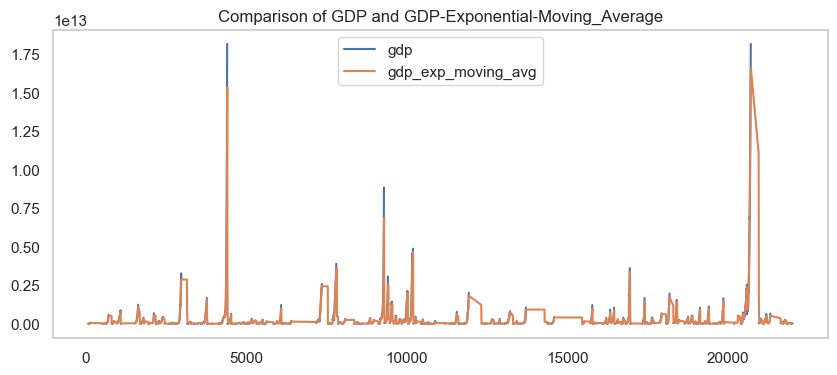

In [32]:
dataset[['gdp', 'gdp_exp_moving_avg']].plot(label='RELIANCE',figsize=(10, 4))
plt.title("Comparison of GDP and GDP-Exponential-Moving_Average")
plt.grid()
plt.show()


<br>

<span style="color: green;">**The visualization leads us to conclude that the Exponential Moving Average effectively represents the original GDP values.**</span>

<br>

In [33]:
# Replace NaN values in 'gdp' column with values from 'gdp_exp_moving_avg' column
dataset['gdp'] = dataset['gdp'].fillna(dataset['gdp_exp_moving_avg'])

In [34]:
dataset.isna().sum()

country                     0
year                        0
iso_code                  185
population                 40
gdp                        50
                         ... 
wind_electricity            0
wind_energy_per_capita      0
wind_share_elec             0
wind_share_energy           0
gdp_exp_moving_avg         50
Length: 130, dtype: int64

## <span style="color:blue;">Exploratory Data Analysis (EDA)<span>

### Energy Consumption Patterns Across Countries

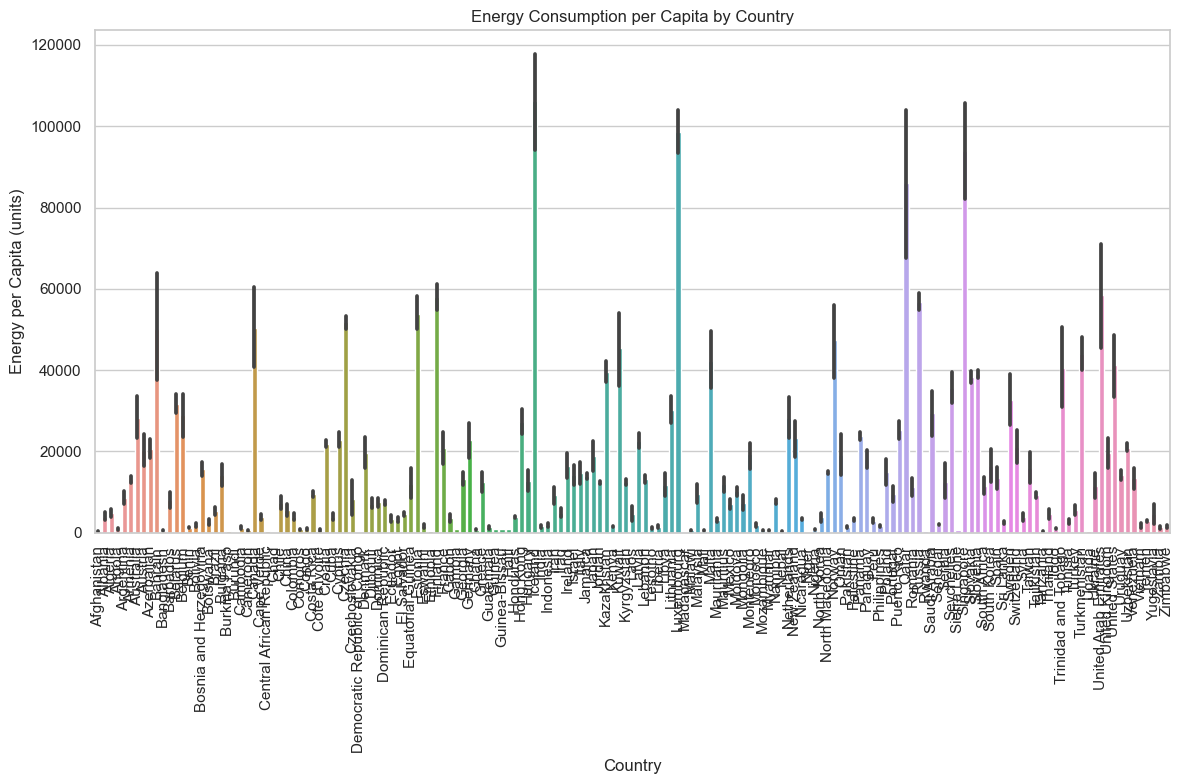

In [35]:
dataset_filtered = dataset[dataset['energy_per_capita'].notna()]

# Plot energy consumption per capita across countries
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=dataset_filtered, x='country', y='energy_per_capita', ax=ax)
ax.set_title('Energy Consumption per Capita by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Energy per Capita (units)')
plt.xticks(rotation=90)
plt.tight_layout()

### Energy Consumption Patterns Accross Continents

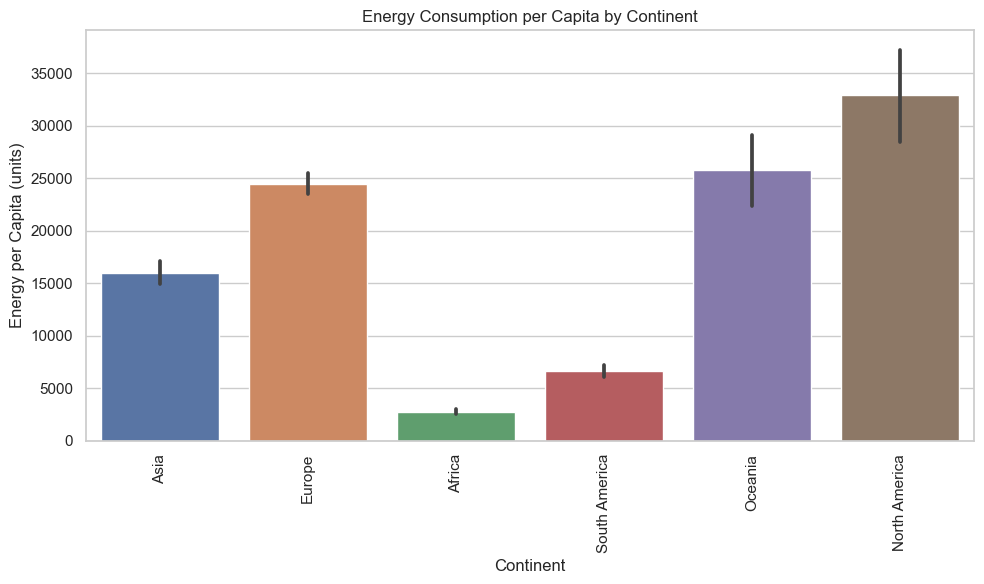

In [36]:
# Create a continent mapping
continent_map = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Cote d\'Ivoire', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Canada', 'Greenland', 'Mexico', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'New Zealand', 'Papua New Guinea'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

# Filter out rows with missing 'energy_per_capita' values
dataset_filtered = dataset[dataset['energy_per_capita'].notna()]

# Add a 'continent' column to the dataset
dataset_filtered['continent'] = dataset_filtered['country'].map(lambda x: next((k for k, v in continent_map.items() if x in v), None))
dataset_filtered = dataset_filtered[dataset_filtered['continent'].notna()]

# Plot energy consumption per capita across continents
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=dataset_filtered, x='continent', y='energy_per_capita', ax=ax)
ax.set_title('Energy Consumption per Capita by Continent')
ax.set_xlabel('Continent')
ax.set_ylabel('Energy per Capita (units)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Energy Consumption By Sector

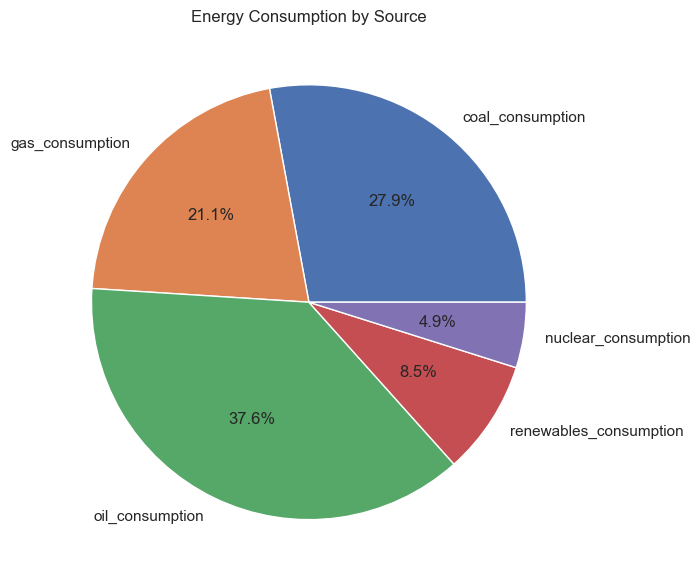

In [37]:
# Plot energy consumption breakdown by source
fig, ax = plt.subplots(figsize=(10, 6))
source_cols = ['coal_consumption', 'gas_consumption', 'oil_consumption', 'renewables_consumption', 'nuclear_consumption']
dataset[source_cols].sum().plot(kind='pie', ax=ax, autopct='%1.1f%%')
ax.set_title('Energy Consumption by Source')
ax.set_ylabel('')
plt.tight_layout()

### Relationship between Energy Consumption and Environmental Impact

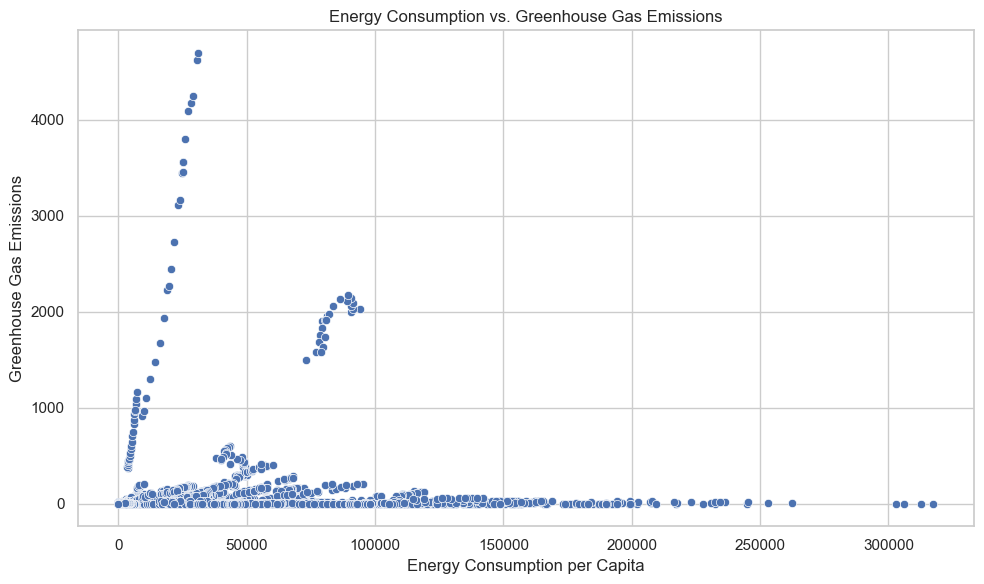

In [38]:
# Plot energy consumption vs. CO2 emissions
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=dataset, x='energy_per_capita', y='greenhouse_gas_emissions', ax=ax)
ax.set_title('Energy Consumption vs. Greenhouse Gas Emissions')
ax.set_xlabel('Energy Consumption per Capita')
ax.set_ylabel('Greenhouse Gas Emissions')
plt.tight_layout()

### Socio-Economic Factors and Energy Consumption

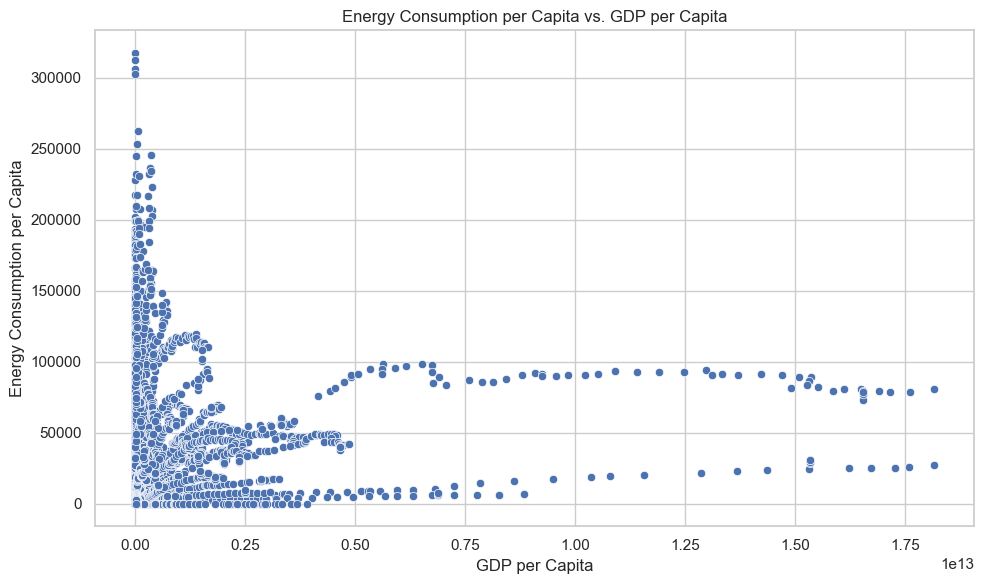

In [39]:
# Plot energy consumption per capita vs. GDP per capita
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=dataset, x='gdp', y='energy_per_capita', ax=ax)
ax.set_title('Energy Consumption per Capita vs. GDP per Capita')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Energy Consumption per Capita')
plt.tight_layout()

### Trends in Energy Consumption and Renewable Energy Share

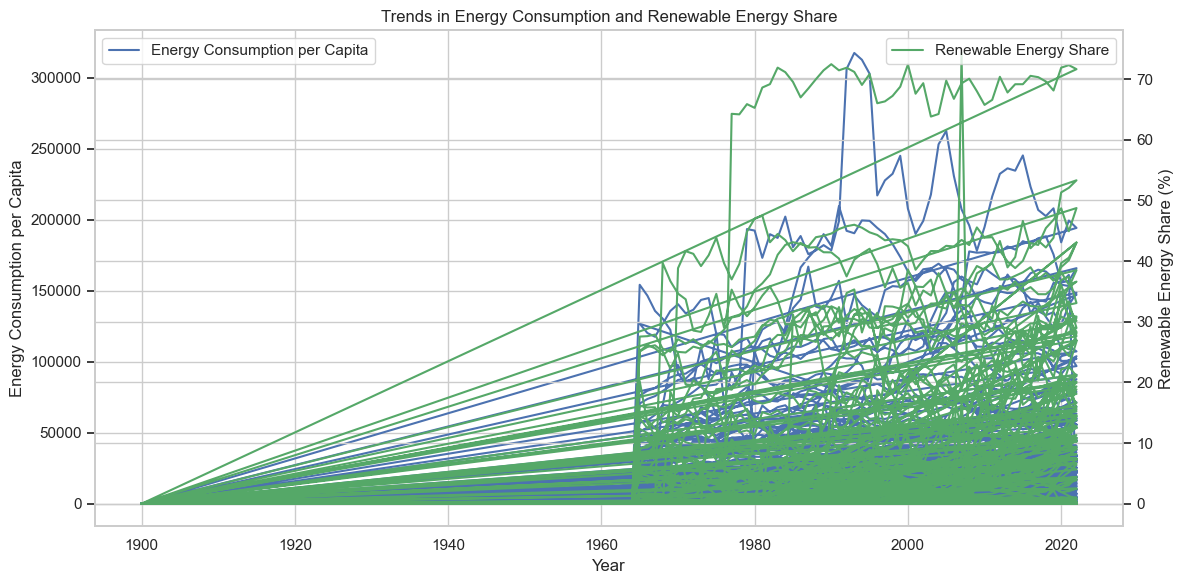

In [40]:
# Plot trends in energy consumption and renewable energy share
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(dataset['year'], dataset['energy_per_capita'], label='Energy Consumption per Capita')
ax2 = ax1.twinx()
ax2.plot(dataset['year'], dataset['renewables_share_energy'], color='g', label='Renewable Energy Share')
ax1.set_title('Trends in Energy Consumption and Renewable Energy Share')
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption per Capita')
ax2.set_ylabel('Renewable Energy Share (%)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()

In [41]:
stacked_data = pd.DataFrame(dataset[["year","biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"]])

# Grouping the stacked_df

A = stacked_data.groupby('year')[["biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"]].sum()

In [42]:
fig = px.bar(A, 
             x=A.index,
             y=["biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"],
             title="Increasing share of electricity generation by different methods across years",
             labels={"value": "Share of Electricity Generation", "variable": "Energy Source", "year": "Year"},
             barmode='stack'
            )

fig.show()

<span style = "color : green;">Over time, there has been a noticeable increase in electricity generation capacities. This trend can likely be attributed to several factors:</span>

The adoption of advanced technologies from more developed nations.

A growing emphasis on renewable energy sources, which has led to significant increases in capacity at certain points.

<span style = "color: green;">Additionally, the sudden spikes observed in the data might be due to inaccuracies or inconsistencies in the data collection process.</span>

In [43]:
from plotly.subplots import make_subplots

# Assuming you have the 'B' DataFrame as described in your code

B = dataset.groupby('year')[['fossil_share_energy','renewables_share_energy','nuclear_share_energy']].mean().reset_index()
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'pie'}]])



# Assuming you have the 'B' DataFrame as described in your code

# Create subplots with one pie chart
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'pie'}]])

# Loop through each year from 1992 to 2022
for year in range(1992, 2023):
    # Filter data for the current year
    filtered_df = B[B['year'] == year]
    
    # Add a pie trace for the current year
    fig.add_trace(go.Pie(
                    labels=['Fossil', 'Renewable', 'Nuclear'],
                    values=[filtered_df['fossil_share_energy'].values[0],
                            filtered_df['renewables_share_energy'].values[0],
                            filtered_df['nuclear_share_energy'].values[0]],
                    textinfo='label+percent', hole=.3))

# Define slider steps for each year
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{'visible': [False] * len(fig.data)},
              {'title_text': f'{2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
        label=str(1992 + i)
    )
    step['args'][0]['visible'][i] = True
    steps.append(step)

# Make the first trace visible by default
fig.data[0].visible = True

# Update layout with title, slider, and formatting
fig.update_layout(
    title_text=f'Share of Electricity Generated',
    title_font_size=24,
    title_x=0.5,
    sliders=[dict(
        active=0,
        currentvalue={"prefix": "Year: "},
        pad={"t": 50},
        steps=steps
    )],
    height=500,
    width=1000,
    font=dict(family='Arial', size=12),
    margin=dict(t=80, l=50, r=50, b=50)
)

# Show the plot
fig.show()

<span style="color:green">
Analyzing the distribution over the years shows a distinct trend towards a greater emphasis on generating energy from renewable sources.</span>

In [44]:
def sparklines(ascending=False):
    # Assuming you have the 'data' DataFrame as described in your code

    # Select relevant columns
    D = dataset[['electricity_generation', 'electricity_demand', 'year', 'country', 'energy_per_capita', 'population']]

    # Group by country and calculate the mean population, select top/bottom 5
    A = dataset.groupby('country')['population'].mean().reset_index().sort_values(by='population', ascending=ascending).head()['country'].tolist()

    # Filter data based on conditions
    D = D[(D['electricity_demand'] != 0) & (D['country'].isin(A))]

    # Generate sparklines plot
    title = "Energy Per Capita of Top 5 countries population wise" if not ascending else "Energy Per Capita of Bottom 5 countries population wise"
    fig = px.line(D, x="year", y="energy_per_capita", facet_row="country", color='country', symbol="country",
                  facet_row_spacing=0.01, height=500, width=1000, title=title)

    # Adjust layout
    fig.update_yaxes(visible=True, fixedrange=True, nticks=2, showgrid=False, zeroline=False, title=None)
    fig.update_layout(annotations=[], overwrite=True, showlegend=True, plot_bgcolor="black", margin=dict(t=35, l=10, b=10, r=10))
    fig.show(config=dict(displayModeBar=False))

In [45]:
sparklines()

In [46]:
sparklines(True)   

<span style="color:green">Observing the y-axis positions of the sparklines reveals a significant difference in values between the TOP-5 and BOTTOM-5. This indicates that countries with larger populations generally have lower energy consumption per capita, while countries with smaller populations tend to have higher energy consumption per capita.</span>

In [47]:
Elec = dataset[dataset['year']>=2000].groupby(['year','country'])[['electricity_demand','electricity_generation']].mean().reset_index()
Elec['ratio'] = Elec['electricity_generation']/Elec['electricity_demand']

Elec['electricity_demand'] = Elec['electricity_demand'].mask(Elec.electricity_demand == 0, 1)
Elec['electricity_demand'] = np.log(Elec['electricity_demand'])
Elec['electricity_demand'] = Elec['electricity_demand'].mask((Elec.electricity_demand <= 0 | Elec.electricity_demand.isna()), 0)


Elec['electricity_generation'] = Elec['electricity_generation'].mask(Elec.electricity_generation == 0, 1)
Elec['electricity_generation'] = np.log(Elec['electricity_generation'])
Elec['electricity_demand'] = Elec['electricity_demand'].mask((Elec.electricity_generation <= 0 | Elec.electricity_generation.isna()), 0)

In [48]:
# fig = px.scatter(E,x= 'electricity_demand', y = 'electricity_generation',color = "year")

fig = px.scatter(Elec,x = 'electricity_demand', y = 'electricity_generation',
                 animation_frame = 'country',color = 'year',title = 'Correlation between Electricity Generation and Demand',size = abs(Elec.electricity_generation),
                 hover_name="country",  labels={'y':'Electricity Demand in terawatt-hours'},
                range_x=[-1,Elec.electricity_demand.max()], range_y=[-2,Elec.electricity_generation.max()])
fig.update_yaxes(visible=True, zeroline=False)

fig.update_layout(
        showlegend=True,
        plot_bgcolor="black",
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50))

fig.show()

<span style = "color : green;">The visualization indicates a consistent increase in both electricity demand and supply over time. Notably, in more developed countries such as the USA, Canada, the UK, and France, there hasn’t been a substantial rise in demand or generation capacity; these values have remained relatively stable for several years.</span>

<span style = "color:green;">Similarly, smaller European nations like Norway, the Netherlands, North Macedonia, Serbia, and Luxembourg show a stable pattern. In contrast, emerging economies such as India, China, Argentina, and Israel have experienced a significant upward trend in electricity demand and generation.</span>

In [49]:
Fossil_E = data[data.year >= 2000].groupby('year')[['greenhouse_gas_emissions','fossil_electricity']].mean().reset_index()

g1 = go.Bar(x=Fossil_E.year, y=Fossil_E.fossil_electricity, name = "Fossil Electricity",  marker_color='goldenrod')
# Create a line chart
g2 = go.Bar(x=Fossil_E.year, y=Fossil_E.greenhouse_gas_emissions, name = "Greenhouse Gas Emissions", marker_color='crimson')

fig = go.Figure(data=[g1,g2])

fig.update_layout(barmode='relative',title_text = "Electricity Generated by Fossils & Emissions of Greenhouse Gas",
        showlegend=True,
        plot_bgcolor="black",
                 height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50))
fig.show()

<span style="color:green">
Despite various measures and regulations, greenhouse gas emissions have continued to rise over the past few decades.

 This trend indicates a pressing need to focus more on renewable energy sources for power generation</span> 

In [50]:
G = dataset.groupby(['year','country']).renewables_share_elec.mean().reset_index()

fig = px.line(G,x='year',y='renewables_share_elec',animation_frame='country', color_discrete_sequence=['gold'], markers=True,
        title = "Year on Year growth in Share of electricity generated by renewables")

fig.update_layout(
        
        plot_bgcolor="black",
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50))

**With ongoing advancements and the concerted efforts of international groups and countries to prioritize renewable energy sources, many nations are increasingly focusing on renewables to enhance their energy security.**

<span style = "color:green;">Despite the growing adoption of renewable energy by companies, the previous chart shows that greenhouse gas emissions continue to rise. If this trend persists, we might see a significant reduction in emissions from electricity generation over the next few decades.</span>

- Having established a basic understanding of our data, we should now move on to more complex tasks, such as:

### Classifying Countries by Energy Security and Self-Sufficiency:
- `Target Label:` A categorical classification indicating different levels of energy self-sufficiency (e.g., "High Self-Sufficiency," "Moderate Self-Sufficiency," "Low Self-Sufficiency").

- `Rationale:` This classification will help identify countries that depend heavily on energy imports and highlight areas where increasing domestic energy production or diversification could be beneficial.

## Data Wrangling

In [51]:
dataset.net_elec_imports.loc[dataset.net_elec_imports == 0] = 1

In [52]:
dataset['energy_production_ratio'] = dataset.electricity_generation/dataset.net_elec_imports

In [53]:
dataset.energy_production_ratio.describe()

count    14177.000000
mean        10.675225
std        498.921581
min     -14206.454545
25%          0.000000
50%          0.000000
75%          0.120000
max      24327.000000
Name: energy_production_ratio, dtype: float64

We need to create a ratio that estimates the amount of electricity generated relative to net electricity imports. Key columns such as `net_elec_imports`, `energy_production_ratio`, different types of energy production values, and per capita energy generation data will be crucial for building a more accurate model. Therefore, we should focus on these important features and drop the less relevant columns to improve our analysis.

In [54]:
ls = ['change_pct','change_twh','share_elec','cons_per_capita','prod_per_capita',
      'carbon_intensity_elec','energy_per_gdp','fossil_electricity','greenhouse_gas_emissions','other_renewable_exc_biofuel_electricity',
     'other_renewables_elec_per_capita_exc_biofuel','other_renewables_share_elec_exc_biofuel','iso_code',
     ]

unnec = []

# Loop through unique column names in the DataFrame
for i in dataset.columns.unique():
    # Check if the last 10 characters of the column name match any suffix in the list
    if i[-10:] in ls:
        unnec.append(i)
    # Check if the last 12 characters of the column name match any suffix in the list
    elif i[-12:] in ls:
        unnec.append(i)
    # Check if the last 15 characters of the column name match any suffix in the list, or the column name is directly in the list
    elif i[-15:] in ls or i in ls:
        unnec.append(i)

# Drop the columns identified as unnecessary
data1 = dataset.drop(unnec,axis = 1)

In [55]:
data1.head()

country  year  population  gdp  biofuel_consumption  \
23  Afghanistan  1900   4707744.0  NaN                  0.0   
24  Afghanistan  1901   4751177.0  NaN                  0.0   
25  Afghanistan  1902   4802500.0  NaN                  0.0   
26  Afghanistan  1903   4861833.0  NaN                  0.0   
27  Afghanistan  1904   4921891.0  NaN                  0.0   

    biofuel_elec_per_capita  biofuel_electricity  biofuel_share_energy  \
23                      0.0                  0.0                   0.0   
24                      0.0                  0.0                   0.0   
25                      0.0                  0.0                   0.0   
26                      0.0                  0.0                   0.0   
27                      0.0                  0.0                   0.0   

    coal_consumption  coal_elec_per_capita  ...  solar_electricity  \
23               0.0                   0.0  ...                0.0   
24               0.0                   0.0  ...                0.0   
25               0.0                   0.0  ...                0.0   
26               0.0                   0.0  ...                0.0   
27               0.0                   0.0  ...                0.0   

    solar_energy_per_capita  solar_share_energy  wind_consumption  \
23                      0.0                 0.0               0.0   
24                      0.0                 0.0               0.0   
25                      0.0                 0.0               0.0   
26                      0.0                 0.0               0.0   
27                      0.0                 0.0               0.0   

    wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
23                   0.0               0.0                     0.0   
24                   0.0               0.0                     0.0   
25                   0.0               0.0                     0.0   
26                   0.0               0.0                     0.0   
27                   0.0               0.0                     0.0   

    wind_share_energy  gdp_exp_moving_avg  energy_production_ratio  
23                0.0                 NaN                      0.0  
24                0.0                 NaN                      0.0  
25                0.0                 NaN                      0.0  
26                0.0                 NaN                      0.0  
27                0.0                 NaN                      0.0  

[5 rows x 74 columns]

In [56]:
data1.describe().T

count          mean           std           min  \
year                     14177.0  1.969266e+03  3.588877e+01  1.900000e+03   
population               14137.0  3.127984e+07  1.088627e+08  1.606100e+04   
gdp                      14127.0  2.951043e+11  1.053756e+12  1.642060e+08   
biofuel_consumption      14177.0  1.181082e+00  1.439302e+01  0.000000e+00   
biofuel_elec_per_capita  14177.0  2.059844e+01  1.212115e+02  0.000000e+00   
...                          ...           ...           ...           ...   
wind_electricity         14177.0  1.066034e+00  1.453553e+01  0.000000e+00   
wind_energy_per_capita   14177.0  5.822008e+01  3.954250e+02  0.000000e+00   
wind_share_energy        14177.0  1.492676e-01  1.016123e+00  0.000000e+00   
gdp_exp_moving_avg       14127.0  2.799934e+11  9.627748e+11  1.703178e+08   
energy_production_ratio  14177.0  1.067523e+01  4.989216e+02 -1.420645e+04   

                                  25%           50%           75%  \
year                     1.938000e+03  1.976000e+03  2.000000e+03   
population               3.001447e+06  7.619393e+06  2.114935e+07   
gdp                      1.599702e+10  4.843829e+10  1.931000e+11   
biofuel_consumption      0.000000e+00  0.000000e+00  0.000000e+00   
biofuel_elec_per_capita  0.000000e+00  0.000000e+00  0.000000e+00   
...                               ...           ...           ...   
wind_electricity         0.000000e+00  0.000000e+00  0.000000e+00   
wind_energy_per_capita   0.000000e+00  0.000000e+00  0.000000e+00   
wind_share_energy        0.000000e+00  0.000000e+00  0.000000e+00   
gdp_exp_moving_avg       1.774406e+10  5.089686e+10  1.889925e+11   
energy_production_ratio  0.000000e+00  0.000000e+00  1.200000e-01   

                                  max  
year                     2.022000e+03  
population               1.425894e+09  
gdp                      1.815160e+13  
biofuel_consumption      4.338660e+02  
biofuel_elec_per_capita  2.514102e+03  
...                               ...  
wind_electricity         8.005200e+02  
wind_energy_per_capita   8.422012e+03  
wind_share_energy        2.615700e+01  
gdp_exp_moving_avg       1.654422e+13  
energy_production_ratio  2.432700e+04  

[73 rows x 8 columns]

**The dataset contains a significant number of zeros, which is understandable. Many countries may not have the resources, infrastructure, or financial capability to generate energy or develop various energy sources. Some might also lack the technological advancements needed for energy production.**

In [57]:
# Importing necessary modules from scikit-learn for machine learning tasks

# Logistic Regression model for binary classification
from sklearn.linear_model import LogisticRegression

# K-Nearest Neighbors classifier for classification based on feature similarity
from sklearn.neighbors import KNeighborsClassifier

# Random Forest classifier for ensemble learning, combining multiple decision trees
from sklearn.ensemble import RandomForestClassifier

# Functions for splitting data into training and test sets, performing cross-validation, and hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedShuffleSplit

# Functions for evaluating model performance through confusion matrices
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# K-Nearest Neighbors imputer for handling missing values by using nearest neighbors
from sklearn.impute import KNNImputer

In [58]:
# Extract the names of columns with data type 'object', excluding the 'year' column
object_columns = data1.select_dtypes(exclude ='object').columns

# Convert the column names to a list and exclude the 'year' column
scaling = [col for col in object_columns if col != 'year']

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

# Create a pipeline for sequential data processing
# In this example, we apply MinMaxScaler to the columns listed in 'scaling'
pipe = Pipeline([("minmaxscale", MinMaxScaler())])

# Set up a ColumnTransformer to apply different transformations to specified columns
# 'pipe' applies MinMaxScaler to the columns in 'scaling'
# 'ss' applies StandardScaler to the 'year' column
# The 'remainder' parameter is set to 'passthrough', so columns not specified will remain unchanged
Ct = ColumnTransformer(
    transformers=[
        ('pipe', pipe, scaling),  # Apply MinMaxScaler to columns listed in 'scaling'
        ('ss', StandardScaler(), ['year'])  # Apply StandardScaler to the 'year' column
    ],
    remainder='passthrough',  # Leave any other columns unchanged
    verbose_feature_names_out=False  # Disable verbose feature names
)

# Transform the data using the defined ColumnTransformer
data1_transformed = Ct.fit_transform(data1)

In [60]:
# Extract the column names, excluding the first two columns
cols = list(data1.columns)[2:]

# Create a DataFrame with the transformed data
# Include the original 'year' and 'country' columns along with the transformed columns
df1 = pd.DataFrame(data1_transformed, columns=cols + ['year', 'country'])

### Our target variable will be significantly influenced by the column:

`energy_production_ratio:` This self-generated column measures a country’s self-sufficiency in energy production. A higher value in this column indicates greater self-sufficiency.

To effectively utilize this column, we need to determine the appropriate threshold values by examining different `percentiles` of the `energy_production_ratio`. 

This will help us establish a classification threshold that reflects the actual distribution of energy self-sufficiency across countries.

In [61]:
# Print percentile values for 'energy_production_ratio'
for i in range(1, 101):
    percentile_value = np.percentile(df1['energy_production_ratio'], i)
    print(f"Energy production ratio at percentile {i} is {percentile_value:.7f}")

Energy production ratio at percentile 1 is 0.3604078
Energy production ratio at percentile 2 is 0.3656967
Energy production ratio at percentile 3 is 0.3672047
Energy production ratio at percentile 4 is 0.3678947
Energy production ratio at percentile 5 is 0.3682296
Energy production ratio at percentile 6 is 0.3683869
Energy production ratio at percentile 7 is 0.3684844
Energy production ratio at percentile 8 is 0.3685709
Energy production ratio at percentile 9 is 0.3686785
Energy production ratio at percentile 10 is 0.3686785
Energy production ratio at percentile 11 is 0.3686785
Energy production ratio at percentile 12 is 0.3686785
Energy production ratio at percentile 13 is 0.3686785
Energy production ratio at percentile 14 is 0.3686785
Energy production ratio at percentile 15 is 0.3686785
Energy production ratio at percentile 16 is 0.3686785
Energy production ratio at percentile 17 is 0.3686785
Energy production ratio at percentile 18 is 0.3686785
Energy production ratio at percentile

In [62]:
# Initialize the 'target' column with the value 'Unknown'
df1['target'] = 'Unknown'

# Assign 'High Self-Sufficiency' to countries with energy production ratio in the top 25th percentile
high_self_sufficiency_threshold = np.percentile(df1['energy_production_ratio'], 75)
df1.loc[df1['energy_production_ratio'] >= high_self_sufficiency_threshold, 'target'] = 'High Self-Sufficiency'

# Assign 'Moderate Self-Sufficiency' to countries with energy production ratio between specific values
moderate_self_sufficiency_range = (0.3686380, 0.3690187)
df1.loc[df1['energy_production_ratio'].between(*moderate_self_sufficiency_range), 'target'] = 'Moderate Self-Sufficiency'

# Assign 'Low Self-Sufficiency' to countries with energy production ratio in the bottom 16th percentile
low_self_sufficiency_threshold = np.percentile(df1['energy_production_ratio'], 16)
df1.loc[df1['energy_production_ratio'] <= low_self_sufficiency_threshold, 'target'] = 'Low Self-Sufficiency'



In [63]:
# Filter rows with 'target' as 'Unknown' and sort by 'energy_production_ratio' in descending order
unknown_target_sorted = df1[df1['target'] == 'Unknown'][['energy_production_ratio', 'target']].sort_values(by='energy_production_ratio', ascending=False)

# Display the sorted DataFrame
print(unknown_target_sorted)

Empty DataFrame
Columns: [energy_production_ratio, target]
Index: []


In [64]:
# There are still many Unknowns, lets check the distribution
df1.target.value_counts()

Low Self-Sufficiency         10519
High Self-Sufficiency         1914
Moderate Self-Sufficiency     1744
Name: target, dtype: int64

In [65]:
# Replace target column values with numerical codes
df1['target'] = df1['target'].replace({
    "Low Self-Sufficiency": 0, 
    "Moderate Self-Sufficiency": 1, 
    "High Self-Sufficiency": 2, 
    "Unknown": 3
})

# Display the count of each value in the target column
target_counts = df1['target'].value_counts()
print(target_counts)

0    10519
2     1914
1     1744
Name: target, dtype: int64


In [66]:
df1.head()

population  gdp biofuel_consumption biofuel_elec_per_capita  \
0    0.00329  NaN                 0.0                     0.0   
1   0.003321  NaN                 0.0                     0.0   
2   0.003357  NaN                 0.0                     0.0   
3   0.003398  NaN                 0.0                     0.0   
4   0.003441  NaN                 0.0                     0.0   

  biofuel_electricity biofuel_share_energy coal_consumption  \
0                 0.0                  0.0              0.0   
1                 0.0                  0.0              0.0   
2                 0.0                  0.0              0.0   
3                 0.0                  0.0              0.0   
4                 0.0                  0.0              0.0   

  coal_elec_per_capita coal_electricity coal_production  ... wind_consumption  \
0                  0.0              0.0             0.0  ...              0.0   
1                  0.0              0.0             0.0  ...              0.0   
2                  0.0              0.0             0.0  ...              0.0   
3                  0.0              0.0             0.0  ...              0.0   
4                  0.0              0.0             0.0  ...              0.0   

  wind_elec_per_capita wind_electricity wind_energy_per_capita  \
0                  0.0              0.0                    0.0   
1                  0.0              0.0                    0.0   
2                  0.0              0.0                    0.0   
3                  0.0              0.0                    0.0   
4                  0.0              0.0                    0.0   

  wind_share_energy gdp_exp_moving_avg energy_production_ratio      year  \
0               0.0                NaN                0.368678 -1.930079   
1               0.0                NaN                0.368678 -1.902214   
2               0.0                NaN                0.368678 -1.874349   
3               0.0                NaN                0.368678 -1.846484   
4               0.0                NaN                0.368678  -1.81862   

       country target  
0  Afghanistan      0  
1  Afghanistan      0  
2  Afghanistan      0  
3  Afghanistan      0  
4  Afghanistan      0  

[5 rows x 75 columns]

In [67]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Apply the encoder to the 'country' column and transform it into numeric values
df1['country'] = encoder.fit_transform(df1['country'].values.reshape(-1, 1))

In [68]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Apply the encoder to the 'country' column, transforming it into one-hot encoded vectors
country_encoded = ohe.fit_transform(np.array(df1['country']).reshape(-1, 1))

# Replace the 'country' column with the new one-hot encoded data
df1 = pd.concat([df1.drop(columns=['country']), pd.DataFrame(country_encoded, columns=ohe.get_feature_names_out(['country']))], axis=1)



In [69]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize StratifiedShuffleSplit to maintain the proportion of target labels in both train and test sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

# Iterate through the split (even though we have only one split)
for train_index,test_index in split.split(np.zeros(len(dataset)),df1.target):
    train_set = df1.loc[train_index]
    test_set = df1.loc[test_index]


In [70]:
# Split the data into train and test sets
df1_train, df1_test = train_test_split(df1, test_size=0.25, random_state=25)



In [71]:
# Separating features and labels for the training set
# Features (X) are all columns except the last column (target)
# Labels (y) are the values in the last column (target)

df1_train_x = train_set.iloc[:, :-1]  # Features for the training set
df1_train_y = train_set.iloc[:, -1]   # Labels for the training set

# Separating features and labels for the test set
# Features (X) are all columns except the last column (target)
# Labels (y) are the values in the last column (target)

df1_test_x = test_set.iloc[:, :-1]  # Features for the test set
df1_test_y = test_set.iloc[:, -1]   # Labels for the test set

## Modelling

1. Logistic Regression

In [72]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can also use 'median', 'most_frequent', or 'constant'
df1_train_x = imputer.fit_transform(df1_train_x)
df1_test_x = imputer.transform(df1_test_x)

In [73]:
logics = LogisticRegression(random_state = 42,max_iter=1000)
cv_logics= cross_validate(logics, df1_train_x, df1_train_y, cv = 5,                          
                           scoring=['precision_micro', 'recall_micro', 'f1_micro'],  
                           return_train_score=True,
                           return_estimator=True)
cv_logics

{'fit_time': array([0.75670576, 0.13116503, 0.11334634, 0.39565945, 0.14459085]),
 'score_time': array([0.02517939, 0.01105499, 0.03517962, 0.02377844, 0.01808214]),
 'estimator': [LogisticRegression(max_iter=1000, random_state=42),
  LogisticRegression(max_iter=1000, random_state=42),
  LogisticRegression(max_iter=1000, random_state=42),
  LogisticRegression(max_iter=1000, random_state=42),
  LogisticRegression(max_iter=1000, random_state=42)],
 'test_precision_micro': array([0.99153738, 0.99153738, 0.9915334 , 0.9915334 , 0.9915334 ]),
 'train_precision_micro': array([0.99153439, 0.99153439, 0.99153539, 0.99153539, 0.99153539]),
 'test_recall_micro': array([0.99153738, 0.99153738, 0.9915334 , 0.9915334 , 0.9915334 ]),
 'train_recall_micro': array([0.99153439, 0.99153439, 0.99153539, 0.99153539, 0.99153539]),
 'test_f1_micro': array([0.99153738, 0.99153738, 0.9915334 , 0.9915334 , 0.9915334 ]),
 'train_f1_micro': array([0.99153439, 0.99153439, 0.99153539, 0.99153539, 0.99153539])}

In [74]:
# Getting mean scores

for i,j in cv_logics.items():
    if type(j)== np.ndarray:
        print(f"{i} Mean is {np.mean(j):.4f}")

fit_time Mean is 0.3083
score_time Mean is 0.0227
test_precision_micro Mean is 0.9915
train_precision_micro Mean is 0.9915
test_recall_micro Mean is 0.9915
train_recall_micro Mean is 0.9915
test_f1_micro Mean is 0.9915
train_f1_micro Mean is 0.9915


## Hyperparameter Tuning of Logistic Regression

In [75]:
logistic_model = LogisticRegression(solver='saga', multi_class='multinomial', random_state=42)

# Define the grid of hyperparameters
param_grid = {
    'max_iter': [100, 1000, 10000],
    'tol': [1e-4, 1e-3, 1e-5],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1.0, 10.0]  # Adding the regularization strength parameter
}

# Set up GridSearchCV with f1_micro scoring for multiclass
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, 
                           scoring='f1_micro', cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(df1_train_x, df1_train_y)

# Output the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Micro Score:", grid_search.best_score_)

Best Parameters: {'C': 10.0, 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.0001}
Best F1 Micro Score: 1.0


In [76]:
# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Retrieve the model with the best found parameters
best_logistic_model = grid_search.best_estimator_

# Fit the best model to the training data
best_logistic_model.fit(df1_train_x, df1_train_y)

Best Parameters: {'C': 10.0, 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.0001}


LogisticRegression(C=10.0, max_iter=1000, multi_class='multinomial',
                   penalty='l1', random_state=42, solver='saga')

In [77]:
# Getting Scores on train and test sets

print(best_logistic_model.score(df1_train_x, df1_train_y))
print(best_logistic_model.score(df1_test_x, df1_test_y))

1.0
1.0


In [78]:
best_log_predict = best_logistic_model.predict(df1_test_x)


In [79]:

from sklearn.metrics import f1_score, confusion_matrix
f1_score(df1_test_y,best_log_predict, average='micro')

1.0

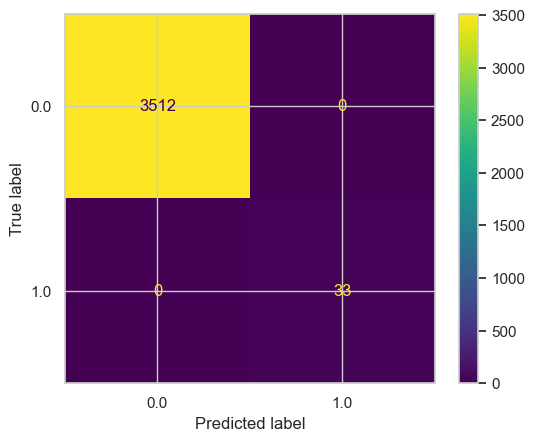

In [80]:
ConfusionMatrixDisplay.from_predictions(df1_test_y, best_log_predict)

next steps>>>

## Feature Engineering for better resulst